/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_51003/1082080042.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Age Group' , hue = 'variable' , y = 'value' , data = pd.melt(df_mood , id_vars = 'Age Group') ,


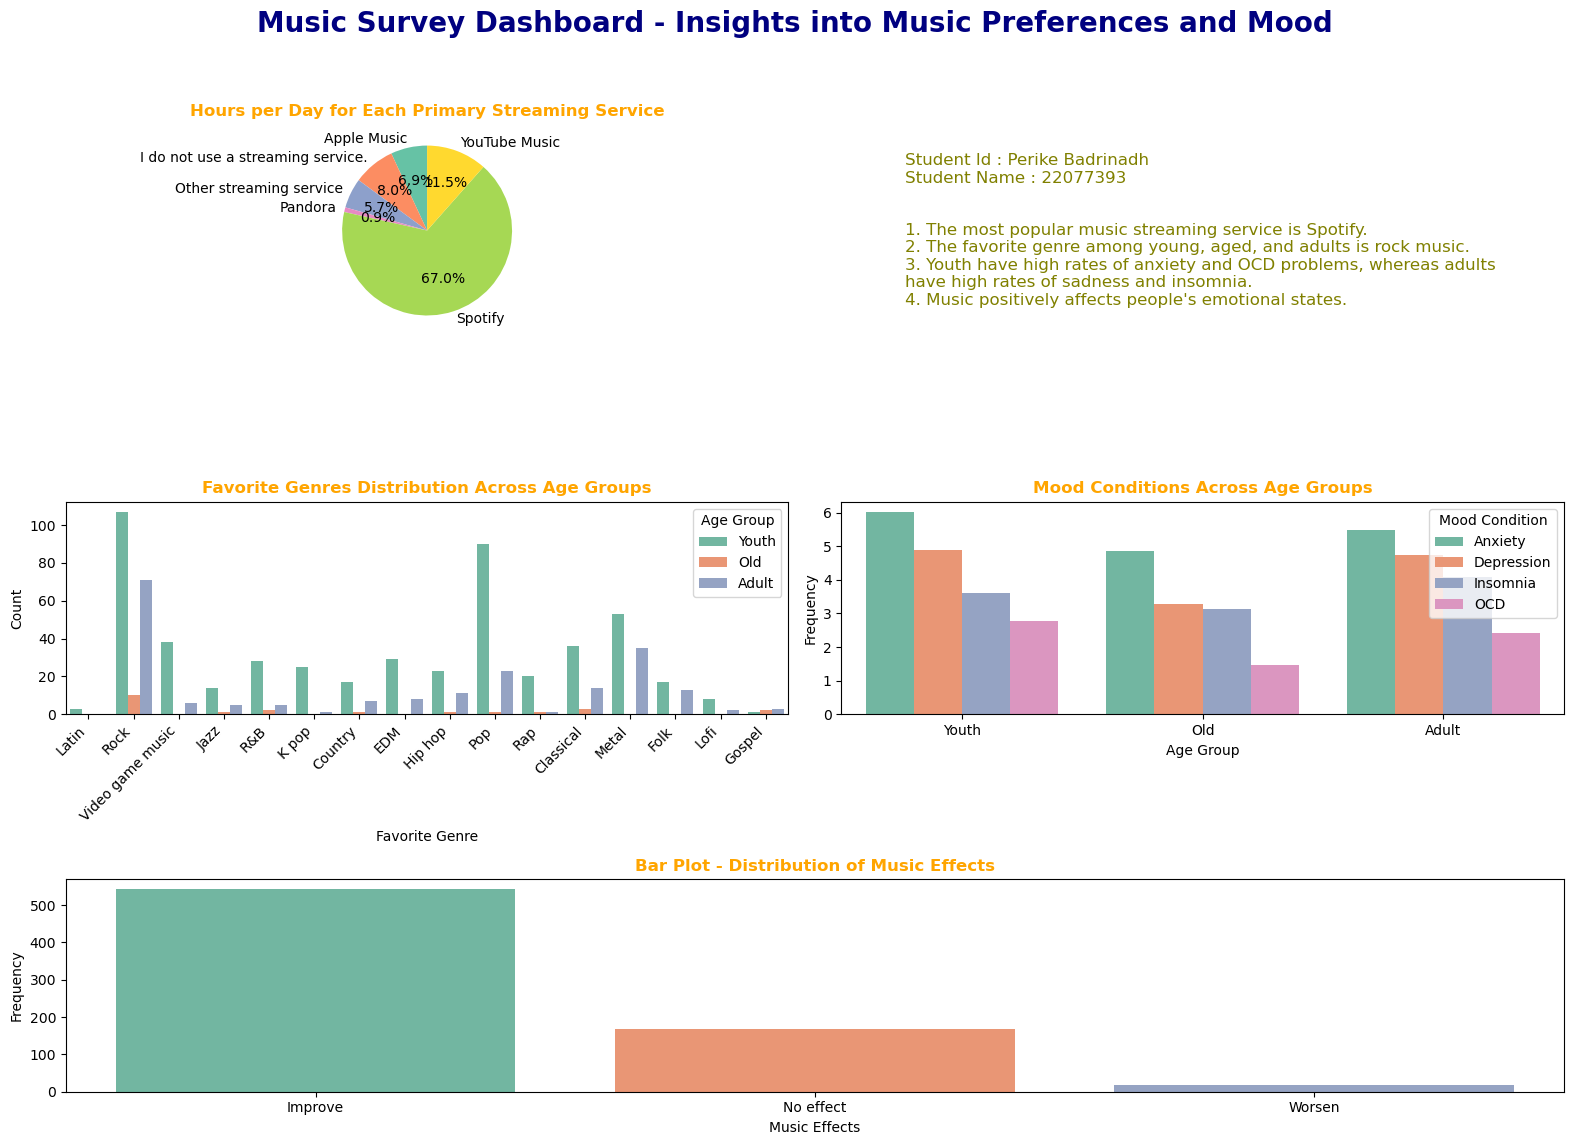

In [1]:
#DataSourceLink : https://www.kaggle.com/code/totoro29/music-and-mental-condition/input
#GithubLink :

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Create a DataFrame
df = pd.read_csv('mxmh_survey_results.csv')

# Set up the layout grid
fig = plt.figure(figsize = (16, 12) , facecolor = 'white')
fig.suptitle('Music Survey Dashboard - Insights into Music Preferences and Mood',
             fontsize = 20 , color = 'navy' , weight = 'bold')  # Updated title

# Define the color palette for the plots
music_palette = sns.color_palette("Set2")


# Define the GridSpec for the layout
grid = GridSpec(3 , 2 , figure = fig)

# Plot 1: Pie chart for 'Primary streaming service' vs 'Hours per day'
ax1 = fig.add_subplot(grid[0 , 0])
df.groupby('Primary streaming service')['Hours per day'].sum().plot.pie(
    autopct = '%1.1f%%' , startangle = 90 , ax = ax1 , colors = music_palette)  # Set color palette
ax1.set_title('Hours per Day for Each Primary Streaming Service' , color = 'orange' , weight = 'bold')
ax1.set_ylabel('')

# Plot 2: Bar plot for 'Fav genre' across age groups
ax2 = fig.add_subplot(grid[1 , 0])
df['Age Group'] = df['Age'].apply(lambda age: 'Youth' if age <= 25 else ('Adult' if 25 < age <= 60 else 'Old'))
sns.countplot(x = 'Fav genre' , hue = 'Age Group' , data = df , ax = ax2 , palette = music_palette)
ax2.set_title('Favorite Genres Distribution Across Age Groups' , color = 'orange' , weight = 'bold')
ax2.set_xlabel('Favorite Genre')
ax2.set_ylabel('Count')
ax2.legend(title = 'Age Group')
ax2.set_xticklabels(ax2.get_xticklabels() , rotation = 45 , ha = 'right')

# Plot 3: Grouped bar plot for 'Anxiety', 'Depression', 'Insomnia', 'OCD'
ax3 = fig.add_subplot(grid[1 , 1])
mood_cols = ['Anxiety' , 'Depression' , 'Insomnia' , 'OCD']
df_mood = df[['Age Group'] + mood_cols]
sns.barplot(x = 'Age Group' , hue = 'variable' , y = 'value' , data = pd.melt(df_mood , id_vars = 'Age Group') ,
            ci = None , ax = ax3 , palette = music_palette)  # Set color palette
ax3.set_title('Mood Conditions Across Age Groups' , color = 'orange' , weight = 'bold')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Frequency')
ax3.legend(title = 'Mood Condition')

ax4 = fig.add_subplot(grid[2 , :])
sns.countplot(x = 'Music effects' , data = df , order = df['Music effects'].value_counts().index ,
              ax = ax4 , palette = music_palette)  # Set color palette
ax4.set_title('Bar Plot - Distribution of Music Effects' , color = 'orange' , weight = 'bold')
ax4.set_xlabel('Music Effects')
ax4.set_ylabel('Frequency')

ax5 = fig.add_subplot(grid[0 , 1])
text = "Student Id : Perike Badrinadh\n" \
       "Student Name : 22077393\n" \
       "\n" \
       "\n"  \
       "1. The most popular music streaming service is Spotify.\n" \
       "2. The favorite genre among young, aged, and adults is rock music.\n" \
       "3. Youth have high rates of anxiety and OCD problems, whereas adults \n" \
       "have high rates of sadness and insomnia.\n" \
       "4. Music positively affects people's emotional states."

# Plot 5: Data Description Text
ax5.text(0.5 , 0.5 , text , ha = 'center' , va = 'center' , fontsize = 12 , color = 'Olive' ,
         multialignment = 'left')
ax5.axis('off')

# Adjust layout for better spacing
fig.tight_layout(rect = [0 , 0.03 , 1 , 0.95])

# plt.savefig('22077393.png' , dpi = 300)
# Display the dashboard
plt.show()
